# Linear regression and Stochastic Gradient Descent

In [93]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [94]:
class SGDRegressor(BaseEstimator):
    
    def __init__(self, eta=1e-3, n_epochs=3):
        self.eta = eta
        self.n_epochs = n_epochs
        
        self.mse_ = []
        self.weight_ = []
    
    def fit(self, X, y):
        X = np.c_[np.ones(len(X)), X]
        w = np.zeros((X.shape[1]))
        y = y.reshape(-1)
        for i in range(self.n_epochs):           
            w += self.eta * ((y - X.dot(w))[i]) * X[i]
            self.weight_.append(np.copy(w))                
            self.mse_.append((((y - X.dot(w))[i])**2)/len(X))
        self.w_ = self.weight_[np.argmin(self.mse_)]
        return self

    def predict(self, X):
        X = np.c_[np.ones(len(X)), X]
        return X.dot(self.w_)

In [95]:
data_demo = pd.read_csv('../data/weights_heights.csv')

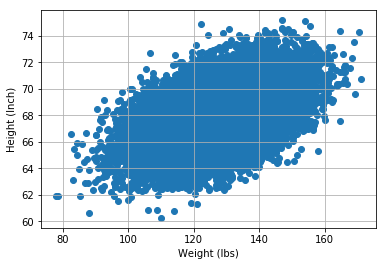

In [96]:
plt.scatter(data_demo['Weight'], data_demo['Height']);
plt.xlabel('Weight (lbs)')
plt.ylabel('Height (Inch)')
plt.grid();

In [97]:
X, y = data_demo['Weight'].values, data_demo['Height'].values

In [98]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=17)

In [99]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

Train created `SGDRegressor` with (`X_train_scaled`, `y_train`) data. Leave default parameter values for now.

In [100]:
sgd = SGDRegressor(eta=0.001, n_epochs=100)
sgd.fit(X_train_scaled, y_train)

SGDRegressor(eta=0.001, n_epochs=100)

In [101]:
sgd.mse_[55]

0.17369458771742857

In [102]:
range(len(sgd.mse_))

range(0, 100)

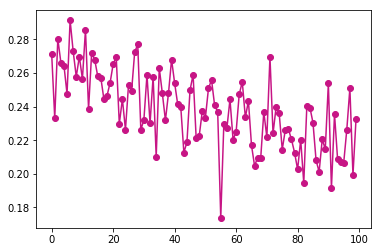

In [103]:
#sns.plot(range(len(sgd.mse_)),sgd.mse_);
plt.plot(range(len(sgd.mse_)), sgd.mse_, marker='o', color='mediumvioletred')
plt.show()

Print the minimal value of mean squared error and the best weights vector.

In [104]:
sgd.mse_[1]

0.23312950271615537

In [105]:
sgd.w_

array([ 3.70135547, -0.7353352 ])

Draw chart of model weights (w0 and w1) behavior during training.

In [107]:
sgd.weight_[0]

array([ 0.06903432, -0.04162395])

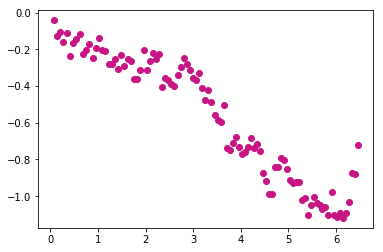

In [108]:
for i in range(len(sgd.weight_)):
    plt.plot(sgd.weight_[i][0], sgd.weight_[i][1], marker='o', color='mediumvioletred')
plt.show()

Make a prediction for hold-out set (`X_valid_scaled`, `y_valid`) and check MSE value

In [109]:
sgd_holdout_mse = mean_squared_error(y_valid, sgd.predict(X_valid_scaled))

In [110]:
from sklearn.linear_model import LinearRegression 

In [111]:
lr = LinearRegression()

In [112]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [113]:
linreg_holdout_mse = mean_squared_error(y_valid, lr.predict(X_valid_scaled))

In [114]:
try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print('Correct!')
except AssertionError:
    print("Something's not good.\n Linreg's holdout MSE: {}"
          "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, 
                                            sgd_holdout_mse))

Something's not good.
 Linreg's holdout MSE: 2.670830767667634
 SGD's holdout MSE: 4141.759605579641
